# 10G数据集读取

## 异常值查询

平均花费异常值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625000 entries, 0 to 5624999
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id          int64  
 1   income      float64
 2   age         int64  
 3   is_active   bool   
 4   gender      object 
 5   country     object 
 6   avg_price   int64  
 7   item_count  int64  
 8   sum_amount  int64  
 9   recency     int64  
dtypes: bool(1), float64(1), int64(6), object(2)
memory usage: 391.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625000 entries, 0 to 5624999
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id          int64  
 1   income      float64
 2   age         int64  
 3   is_active   bool   
 4   gender      object 
 5   country     object 
 6   avg_price   int64  
 7   item_count  int64  
 8   sum_amount  int64  
 9   recency     int64  
dtypes: bool(1), float64(1), int64(6), object(2)
memory usage: 391.6+ MB
None
<class 'pandas.cor

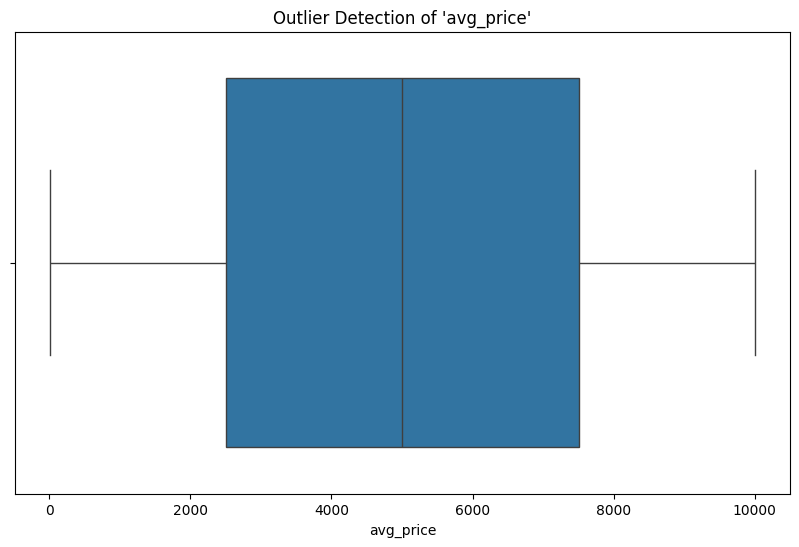

182.02109265327454


In [1]:
import numpy as np
import os
import pyarrow.parquet as pq
import pandas as pd
import time, json
import matplotlib.pyplot as plt
import seaborn as sns

start_time = time.time()  # 记录开始时间

folder_path = 'C:\\Users\\HP\\Downloads\\10G_data_new2'
parquet_files = [f for f in os.listdir(folder_path) if f.endswith('.parquet')]

# 初始化空的DataFrame用于存储数据
data = pd.DataFrame()
# 逐个读取Parquet文件中的数据并进行去重处理
for file in parquet_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_parquet(file_path, engine='pyarrow')
    print(df.info())
    data=pd.concat([data, df])

# 1. 计算 Q1, Q3 和 IQR
Q1 = data['avg_price'].quantile(0.25)
Q3 = data['avg_price'].quantile(0.75)
IQR = Q3 - Q1

# 2. 定义异常值的上下界
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

# 3. 标记异常值
outliers = data[(data['avg_price'] < lower_bound) | (data['avg_price'] > upper_bound)]
print(f"Avg_price检测到 {len(outliers)} 个异常值。")

# 4. 可视化检测（可选）
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['avg_price'])
plt.title("Outlier Detection of 'avg_price'")
plt.show()
print(time.time()-start_time)
# # 4. 删除异常值
# clean_df_no_outliers = data[(data['avg_price'] >= lower_bound) & (data['avg_price'] <= upper_bound)]

# # 更新 clean_df（删除异常值后的数据）
# clean_df = clean_df_no_outliers.copy()

# # 检查删除后的数据
# print("\n删除异常值后的数据统计：")
# print(clean_df['avg_price'].describe())

总消费金额异常值

-19809.0 47655.0
Sum_amount检测到 423130 个异常值。


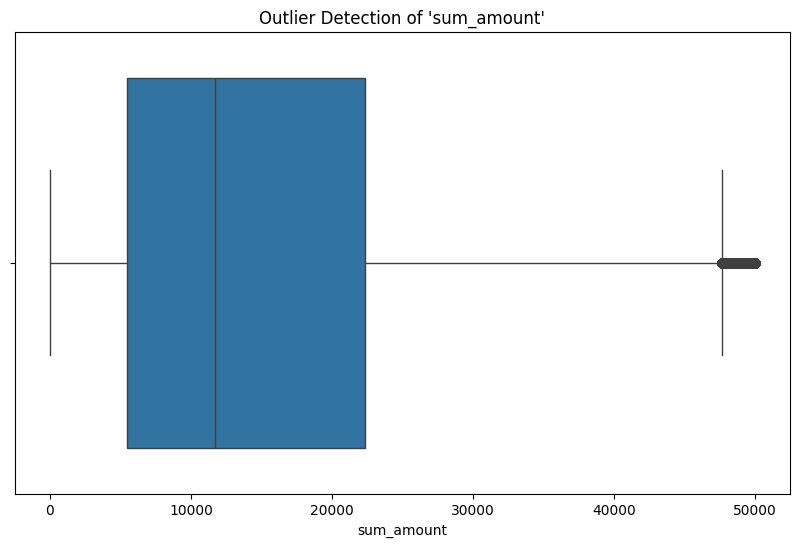

150.05455327033997


In [2]:
import numpy as np

start_time = time.time()  # 记录开始时间

folder_path = 'C:\\Users\\HP\\Downloads\\10G_data_new2'
parquet_files = [f for f in os.listdir(folder_path) if f.endswith('.parquet')]

# 初始化空的DataFrame用于存储数据
data = pd.DataFrame()
# 逐个读取Parquet文件中的数据并进行去重处理
for file in parquet_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_parquet(file_path, engine='pyarrow', columns=['sum_amount'])
    data=pd.concat([data, df])

# 1. 计算 Q1, Q3 和 IQR
Q1 = data['sum_amount'].quantile(0.25)
Q3 = data['sum_amount'].quantile(0.75)
IQR = Q3 - Q1

# 2. 定义异常值的上下界
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

# 3. 标记异常值
outliers = data[(data['sum_amount'] < lower_bound) | (data['sum_amount'] > upper_bound)]
print(f"Sum_amount检测到 {len(outliers)} 个异常值。")

# 4. 可视化检测（可选）
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['sum_amount'])
plt.title("Outlier Detection of 'sum_amount'")
plt.show()
print(time.time()-start_time)
# # 4. 删除异常值
# clean_df_no_outliers = data[(data['avg_price'] >= lower_bound) & (data['avg_price'] <= upper_bound)]

# # 更新 clean_df（删除异常值后的数据）
# clean_df = clean_df_no_outliers.copy()

# # 检查删除后的数据
# print("\n删除异常值后的数据统计：")
# print(clean_df['avg_price'].describe())

收入异常值

-500107.1337499999 1500126.4162499998
Income检测到 0 个异常值。


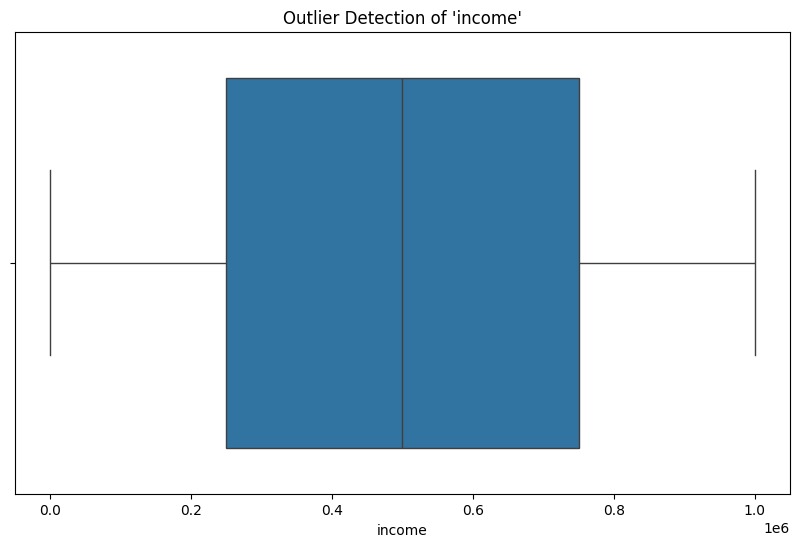

156.12090849876404


In [3]:
import numpy as np

start_time = time.time()  # 记录开始时间

folder_path = 'C:\\Users\\HP\\Downloads\\10G_data_new2'
parquet_files = [f for f in os.listdir(folder_path) if f.endswith('.parquet')]

# 初始化空的DataFrame用于存储数据
data = pd.DataFrame()
# 逐个读取Parquet文件中的数据并进行去重处理
for file in parquet_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_parquet(file_path, engine='pyarrow', columns=['income'])
    data=pd.concat([data, df])

# 1. 计算 Q1, Q3 和 IQR
Q1 = data['income'].quantile(0.25)
Q3 = data['income'].quantile(0.75)
IQR = Q3 - Q1

# 2. 定义异常值的上下界
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

# 3. 标记异常值
outliers = data[(data['income'] < lower_bound) | (data['income'] > upper_bound)]
print(f"Income检测到 {len(outliers)} 个异常值。")

# 4. 可视化检测（可选）
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['income'])
plt.title("Outlier Detection of 'income'")
plt.show()
print(time.time()-start_time)
# # 4. 删除异常值
# clean_df_no_outliers = data[(data['avg_price'] >= lower_bound) & (data['avg_price'] <= upper_bound)]

# # 更新 clean_df（删除异常值后的数据）
# clean_df = clean_df_no_outliers.copy()

# # 检查删除后的数据
# print("\n删除异常值后的数据统计：")
# print(clean_df['avg_price'].describe())

年龄异常值

-25.0 143.0
Age检测到 0 个异常值。


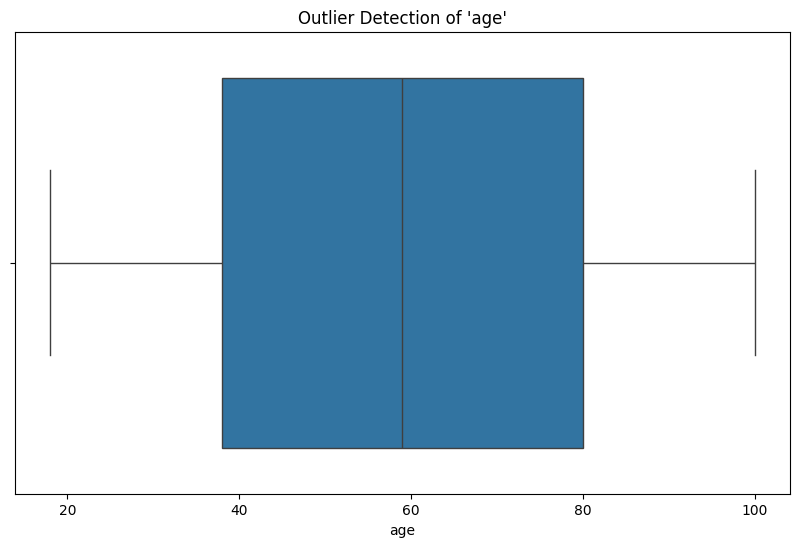

In [4]:
import numpy as np

start_time = time.time()  # 记录开始时间

folder_path = 'C:\\Users\\HP\\Downloads\\10G_data_new2'
parquet_files = [f for f in os.listdir(folder_path) if f.endswith('.parquet')]

# 初始化空的DataFrame用于存储数据
data = pd.DataFrame()
# 逐个读取Parquet文件中的数据并进行去重处理
for file in parquet_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_parquet(file_path, engine='pyarrow', columns=['age'])
    data=pd.concat([data, df])

# 1. 计算 Q1, Q3 和 IQR
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

# 2. 定义异常值的上下界
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

# 3. 标记异常值
outliers = data[(data['age'] < lower_bound) | (data['age'] > upper_bound)]
print(f"Age检测到 {len(outliers)} 个异常值。")

# 4. 可视化检测（可选）
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['age'])
plt.title("Outlier Detection of 'age'")
plt.show()

# # 4. 删除异常值
# clean_df_no_outliers = data[(data['avg_price'] >= lower_bound) & (data['avg_price'] <= upper_bound)]

# # 更新 clean_df（删除异常值后的数据）
# clean_df = clean_df_no_outliers.copy()

# # 检查删除后的数据
# print("\n删除异常值后的数据统计：")
# print(clean_df['avg_price'].describe())

日期异常值

-929.5 2890.5
Recency 检测到 0 个异常值。


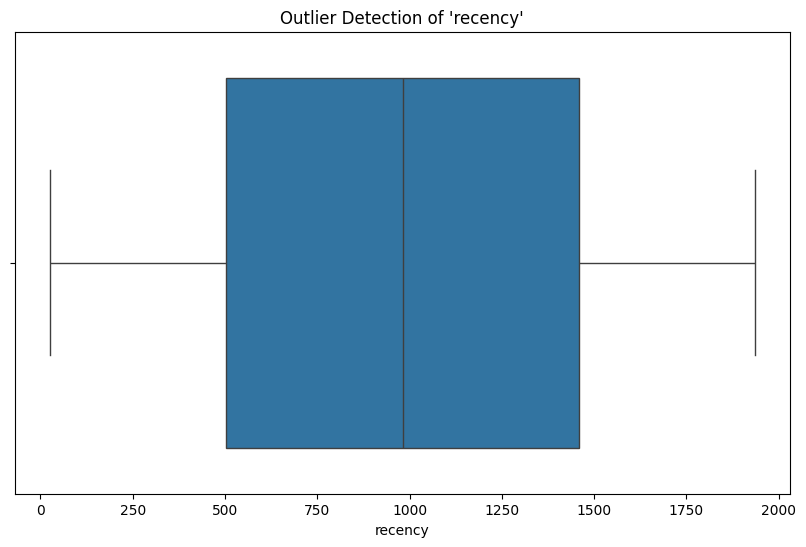

In [5]:
import numpy as np

start_time = time.time()  # 记录开始时间

folder_path = 'C:\\Users\\HP\\Downloads\\10G_data_new2'
parquet_files = [f for f in os.listdir(folder_path) if f.endswith('.parquet')]

# 初始化空的DataFrame用于存储数据
data = pd.DataFrame()
# 逐个读取Parquet文件中的数据并进行去重处理
for file in parquet_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_parquet(file_path, engine='pyarrow', columns=['recency'])
    data=pd.concat([data, df])

# 1. 计算 Q1, Q3 和 IQR
Q1 = data['recency'].quantile(0.25)
Q3 = data['recency'].quantile(0.75)
IQR = Q3 - Q1

# 2. 定义异常值的上下界
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

# 3. 标记异常值
outliers = data[(data['recency'] < lower_bound) | (data['recency'] > upper_bound)]
print(f"Recency 检测到 {len(outliers)} 个异常值。")

# 4. 可视化检测（可选）
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['recency'])
plt.title("Outlier Detection of 'recency'")
plt.show()

# # 4. 删除异常值
# clean_df_no_outliers = data[(data['avg_price'] >= lower_bound) & (data['avg_price'] <= upper_bound)]

# # 更新 clean_df（删除异常值后的数据）
# clean_df = clean_df_no_outliers.copy()

# # 检查删除后的数据
# print("\n删除异常值后的数据统计：")
# print(clean_df['avg_price'].describe())

去除异常值，得到最终的数据集

In [6]:
start_time = time.time()  # 记录开始时间

folder_path = 'C:\\Users\\HP\\Downloads\\10G_data_new2'
parquet_files = [f for f in os.listdir(folder_path) if f.endswith('.parquet')]

# 初始化空的DataFrame用于存储数据
data = pd.DataFrame()
id=0
# 逐个读取Parquet文件中的数据并进行去重处理
for file in parquet_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_parquet(file_path, engine='pyarrow')
    print(df.info())
    df = df[df['sum_amount'] <= 47655.0]
    df['gender'] = df['gender'].replace('未指定', '其他')
    df.to_parquet('C:\\Users\\HP\\Downloads\\10G_data_new3\\'+'filter'+str(id)+".parquet")
    print(df.shape)
    id+=1

print(time.time()-start_time)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625000 entries, 0 to 5624999
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id          int64  
 1   income      float64
 2   age         int64  
 3   is_active   bool   
 4   gender      object 
 5   country     object 
 6   avg_price   int64  
 7   item_count  int64  
 8   sum_amount  int64  
 9   recency     int64  
dtypes: bool(1), float64(1), int64(6), object(2)
memory usage: 391.6+ MB
None
(5572137, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5625000 entries, 0 to 5624999
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id          int64  
 1   income      float64
 2   age         int64  
 3   is_active   bool   
 4   gender      object 
 5   country     object 
 6   avg_price   int64  
 7   item_count  int64  
 8   sum_amount  int64  
 9   recency     int64  
dtypes: bool(1), float64(1), int64(6), object(2)
memory usage: 391.6+ MB
None
(557

## 各列基本信息统计
统计数值变量信息

In [7]:
import numpy as np
import os
import pyarrow.parquet as pq
import pandas as pd
import time, json
import matplotlib.pyplot as plt
import seaborn as sns
start_time = time.time()  # 记录开始时间

folder_path = 'C:\\Users\\HP\\Downloads\\10G_data_new3'
parquet_files = [f for f in os.listdir(folder_path) if f.endswith('.parquet')]

# 读取dataframe的所有数值变量
data = pd.DataFrame()
for file in parquet_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_parquet(file_path, engine='pyarrow', columns=['age', 'income', 'avg_price', 'sum_amount', 'recency'])
    data=pd.concat([data, df])

print("平均值Income：", data['income'].mean())
print("平均值Age：", data['age'].mean())
print("平均值Avg Price：", data['avg_price'].mean())
print("平均值Sum Amount：", data['sum_amount'].mean())
print("平均值Recency：", data['recency'].mean())
print(time.time()-start_time)

平均值Income： 500000.7687788645
平均值Age： 58.9989002143937
平均值Avg Price： 4959.4783911252625
平均值Sum Amount： 14692.721006140628
平均值Recency： 980.5952853127642
10.936269521713257


In [8]:
start_time = time.time()  # 记录开始时间

folder_path = 'C:\\Users\\HP\\Downloads\\10G_data_new3'
parquet_files = [f for f in os.listdir(folder_path) if f.endswith('.parquet')]

# 读取dataframe的所有数值变量
data = pd.DataFrame()
for file in parquet_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_parquet(file_path, engine='pyarrow', columns=['gender', 'country', 'is_active'])
    data=pd.concat([data, df])

print(data['gender'].value_counts())
print(data['country'].value_counts())
print(data['is_active'].value_counts())
print(time.time()-start_time)

gender
男     21400292
女     21394896
其他     1781682
Name: count, dtype: int64
country
英国      4459587
法国      4459047
美国      4458515
德国      4458144
巴西      4457772
俄罗斯     4457246
澳大利亚    4457147
印度      4456747
日本      4456614
中国      4456051
Name: count, dtype: int64
is_active
False    22289395
True     22287475
Name: count, dtype: int64
38.342347145080566


## 计算相关系数

In [ ]:
from pandas.plotting import scatter_matrix
import numpy as np
import os
import pyarrow.parquet as pq
import pandas as pd
import time, json
import matplotlib.pyplot as plt

# 4. 相关系数计算：仅age和credit_score间有很强的正相关性
start_time = time.time()  # 记录开始时间

folder_path = 'C:\\Users\\HP\\Downloads\\10G_data_new3'
parquet_files = [f for f in os.listdir(folder_path) if f.endswith('.parquet')]

# 读取dataframe的所有数值变量
data = pd.DataFrame()
for file in parquet_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_parquet(file_path, engine='pyarrow', columns=['age', 'income', 'avg_price', 'sum_amount', 'recency'])
    data=pd.concat([data, df])

print(data.corr())
print(time.time()-start_time)

                 age    income  avg_price  sum_amount   recency
age         1.000000  0.000202   0.000048   -0.000038 -0.000157
income      0.000202  1.000000  -0.000135   -0.000059  0.000054
avg_price   0.000048 -0.000135   1.000000    0.719715 -0.000262
sum_amount -0.000038 -0.000059   0.719715    1.000000 -0.000100
recency    -0.000157  0.000054  -0.000262   -0.000100  1.000000
181.36219930648804


Gender和Country之间有关系


行百分比表:
country    中国   俄罗斯    印度    巴西    德国    日本    法国  澳大利亚    美国    英国
gender                                                             
其他       10.0  10.0  10.0  10.0  10.0  10.0  10.0  10.0  10.0  10.0
女        10.0  10.0  10.0  10.0  10.0  10.0  10.0  10.0  10.0  10.0
男        10.0  10.0  10.0  10.0  10.0  10.0  10.0  10.0  10.0  10.0


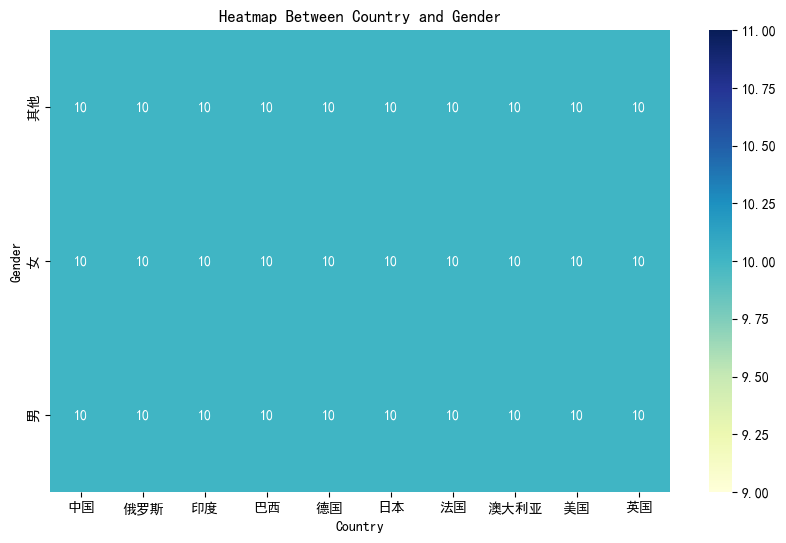


卡方检验结果: 卡方值=0.0000, p值=1.0000
性别与国家没有显著相关性(p >= 0.05)


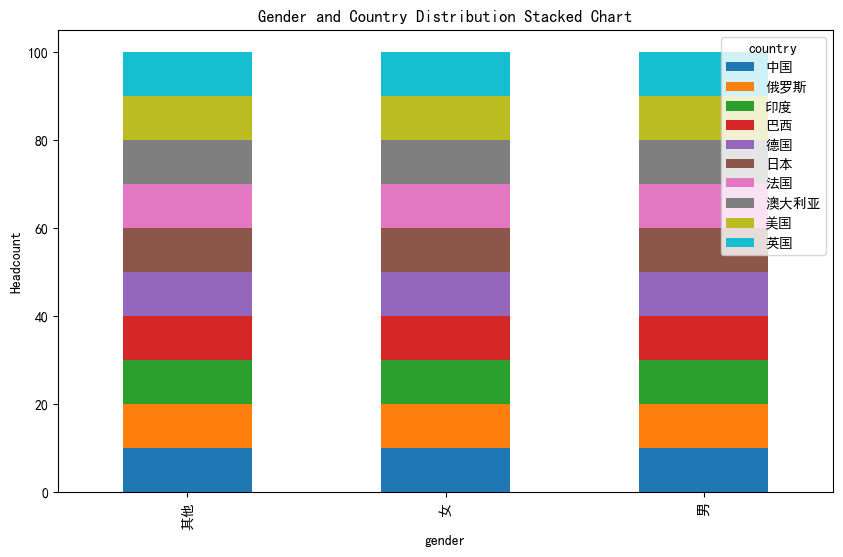

51.08946919441223


In [2]:
from scipy.stats import chi2_contingency
import seaborn as sns
from pandas.plotting import scatter_matrix
import numpy as np
import os
import pyarrow.parquet as pq
import pandas as pd
import time, json
import matplotlib.pyplot as plt

start_time = time.time()  # 记录开始时间
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体

folder_path = 'C:\\Users\\HP\\Downloads\\10G_data_new3'
parquet_files = [f for f in os.listdir(folder_path) if f.endswith('.parquet')]

# 读取dataframe的所有数值变量
data = pd.DataFrame()
for file in parquet_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_parquet(file_path, engine='pyarrow', columns=['gender', 'country', 'is_active'])
    data=pd.concat([data, df])

# 计算百分比表(按行显示百分比)
print("\n行百分比表:")
cross_tab=pd.crosstab(data['gender'], data['country'], normalize='index').round(2)*100
print(cross_tab)

# 可视化展示
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu')
plt.title('Heatmap Between Country and Gender')
plt.xlabel('Country')
plt.ylabel('Gender')
plt.show()

# 卡方检验检验相关性
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"\n卡方检验结果: 卡方值={chi2:.4f}, p值={p:.4f}")

if p < 0.05:
    print("性别与国家存在显著相关性(p < 0.05)")
else:
    print("性别与国家没有显著相关性(p >= 0.05)")

# 5. 绘制堆叠条形图
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender and Country Distribution Stacked Chart')
plt.ylabel('Headcount')
plt.show()
print(time.time()-start_time)

Gender和Is_active之间没有关系


行百分比表:
is_active  False  True 
gender                 
其他          50.0   50.0
女           50.0   50.0
男           50.0   50.0


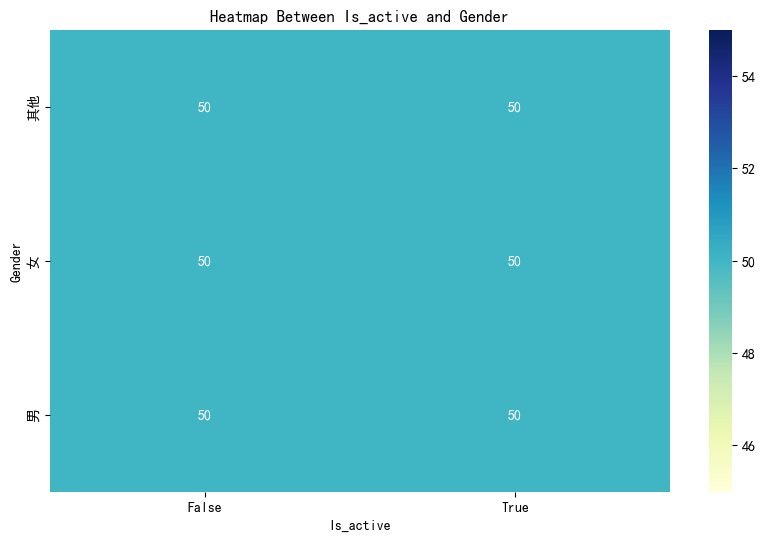


卡方检验结果: 卡方值=0.0000, p值=1.0000
性别与是否活跃没有显著相关性(p >= 0.05)


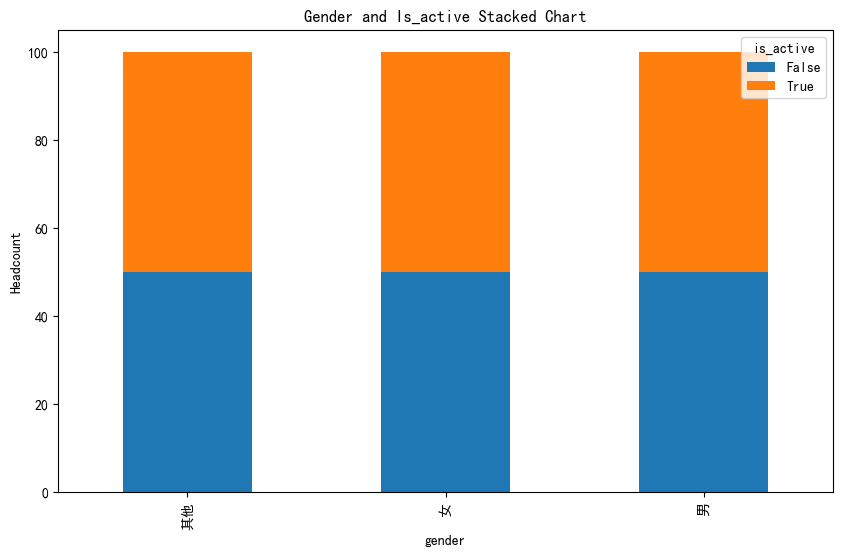

149.1685860157013


In [9]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体

# 计算百分比表(按行显示百分比)
print("\n行百分比表:")
cross_tab=pd.crosstab(data['gender'], data['is_active'], normalize='index').round(2)*100
print(cross_tab)

# 可视化展示
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu')
plt.title('Heatmap Between Is_active and Gender')
plt.xlabel('Is_active')
plt.ylabel('Gender')
plt.show()

# 4. 卡方检验检验相关性
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"\n卡方检验结果: 卡方值={chi2:.4f}, p值={p:.4f}")

if p < 0.05:
    print("性别与是否活跃存在显著相关性(p < 0.05)")
else:
    print("性别与是否活跃没有显著相关性(p >= 0.05)")

# 5. 绘制堆叠条形图
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender and Is_active Stacked Chart')
plt.ylabel('Headcount')
plt.show()
print(time.time()-start_time)

Country和Is_active之间没有关系


行百分比表:
is_active  False  True 
country                
中国          50.0   50.0
俄罗斯         50.0   50.0
印度          50.0   50.0
巴西          50.0   50.0
德国          50.0   50.0
日本          50.0   50.0
法国          50.0   50.0
澳大利亚        50.0   50.0
美国          50.0   50.0
英国          50.0   50.0


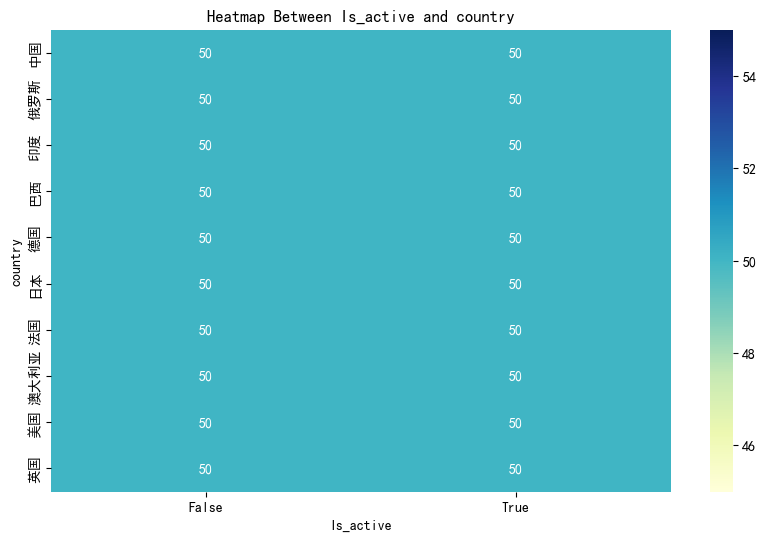


卡方检验结果: 卡方值=0.0000, p值=1.0000
国家与是否活跃没有显著相关性(p >= 0.05)


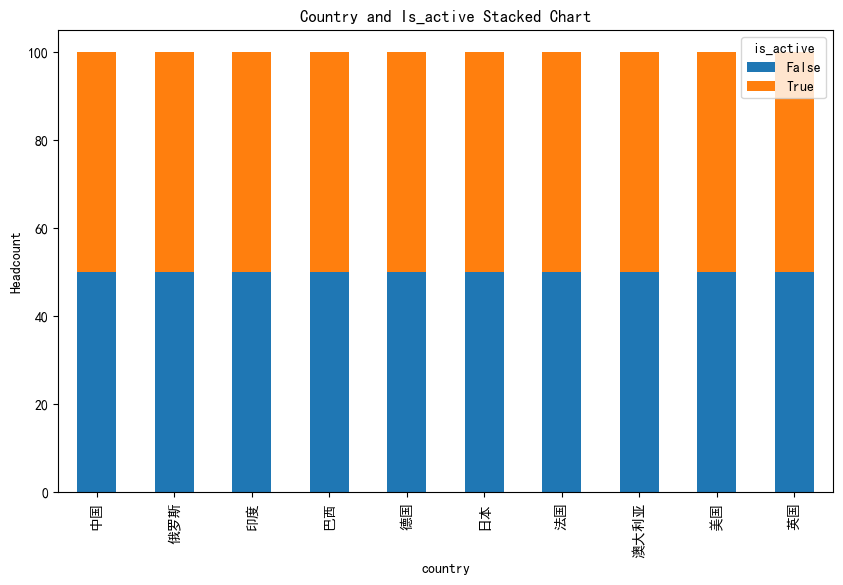

175.00882983207703


In [10]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt


# 计算百分比表(按行显示百分比)
print("\n行百分比表:")
cross_tab=pd.crosstab(data['country'], data['is_active'], normalize='index').round(2)*100
print(cross_tab)

# 可视化展示
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu')
plt.title('Heatmap Between Is_active and country')
plt.xlabel('Is_active')
plt.ylabel('country')
plt.show()

# 4. 卡方检验检验相关性
chi2, p, dof, expected = chi2_contingency(cross_tab)
print(f"\n卡方检验结果: 卡方值={chi2:.4f}, p值={p:.4f}")

if p < 0.05:
    print("国家与是否活跃存在显著相关性(p < 0.05)")
else:
    print("国家与是否活跃没有显著相关性(p >= 0.05)")

# 5. 绘制堆叠条形图
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Country and Is_active Stacked Chart')
plt.ylabel('Headcount')
plt.show()
print(time.time()-start_time)

## 影响Sum Amount的因素有哪些？

gender的影响

             count          mean           std   min     25%      50%  \
gender                                                                  
其他       1781682.0  14696.748198  11495.445948  10.0  5430.0  11525.0   
女       21394896.0  14693.309186  11488.022693  10.0  5440.0  11523.0   
男       21400292.0  14691.797690  11487.328229  10.0  5438.0  11520.0   

            75%      max  
gender                    
其他      21925.0  47655.0  
女       21909.0  47655.0  
男       21900.0  47655.0  


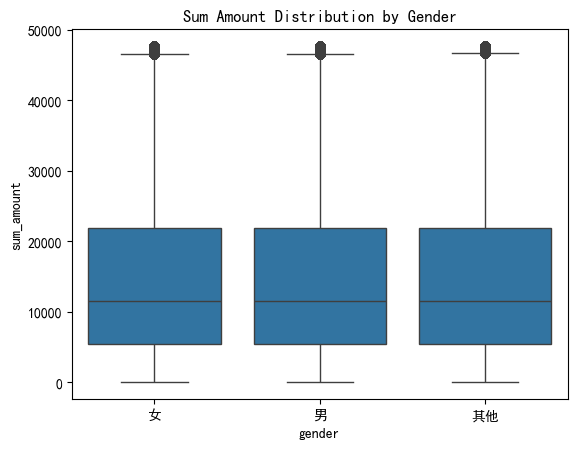

In [13]:
folder_path = 'C:\\Users\\HP\\Downloads\\10G_data_new3'
parquet_files = [f for f in os.listdir(folder_path) if f.endswith('.parquet')]

# 读取dataframe的所有数值变量
data = pd.DataFrame()
for file in parquet_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_parquet(file_path, engine='pyarrow', columns=['gender', 'sum_amount'])
    data=pd.concat([data, df])

# 分组统计
grouped = data.groupby('gender')['sum_amount'].describe()
print(grouped)

# 可视化（箱线图或小提琴图）
sns.boxplot(x='gender', y='sum_amount', data=data)
plt.title('Sum Amount Distribution by Gender')
plt.show()

In [14]:
from scipy.stats import ttest_ind, mannwhitneyu

# 按性别分组
male_income = data[data['gender'] == '男']['sum_amount']
female_income = data[data['gender'] == '女']['sum_amount']

# 正态性检验（需先验证，这里省略）
# 方法1: t检验
t_stat, p_value = ttest_ind(male_income, female_income)
print(f"T-test p-value: {p_value:.4f}")

# 方法2: Mann-Whitney U检验
u_stat, p_value = mannwhitneyu(male_income, female_income)
print(f"Mann-Whitney U p-value: {p_value:.4f}")

T-test p-value: 0.6669
Mann-Whitney U p-value: 0.7044


country的影响

             count          mean           std   min     25%      50%  \
country                                                                 
中国       4456051.0  14685.762563  11483.253372  10.0  5445.0  11508.0   
俄罗斯      4457246.0  14692.975657  11491.799238  10.0  5435.0  11518.0   
印度       4456747.0  14697.631631  11487.280607  10.0  5444.0  11525.0   
巴西       4457772.0  14689.080593  11487.336646  10.0  5437.0  11516.0   
德国       4458144.0  14680.641069  11481.420565  10.0  5432.0  11508.0   
日本       4456614.0  14701.127134  11488.098387  10.0  5445.0  11544.0   
法国       4459047.0  14700.016984  11498.939446  10.0  5433.0  11528.0   
澳大利亚     4457147.0  14698.134770  11489.527475  10.0  5444.0  11532.0   
美国       4458515.0  14692.705953  11489.729324  10.0  5434.0  11520.0   
英国       4459587.0  14689.135507  11482.455960  10.0  5439.0  11522.0   

             75%      max  
country                    
中国       21890.0  47655.0  
俄罗斯      21905.0  47655.0  
印度       21

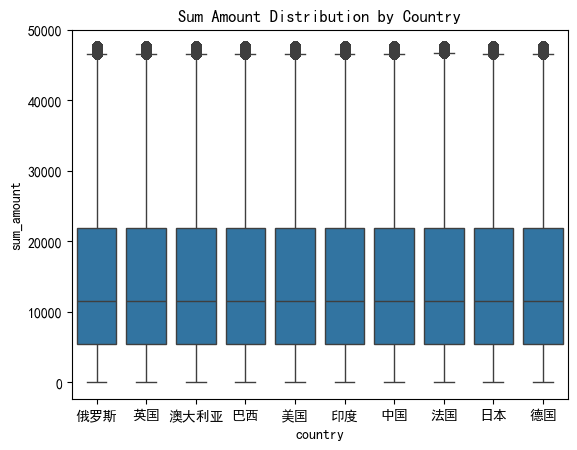

In [15]:
folder_path = 'C:\\Users\\HP\\Downloads\\10G_data_new3'
parquet_files = [f for f in os.listdir(folder_path) if f.endswith('.parquet')]

# 读取dataframe的所有数值变量
data = pd.DataFrame()
for file in parquet_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_parquet(file_path, engine='pyarrow', columns=['country', 'sum_amount'])
    data=pd.concat([data, df])

# 分组统计
grouped = data.groupby('country')['sum_amount'].describe()
print(grouped)

# 可视化（箱线图或小提琴图）
sns.boxplot(x='country', y='sum_amount', data=data)
plt.title('Sum Amount Distribution by Country')
plt.show()

是否活跃的影响

                count          mean           std   min     25%      50%  \
is_active                                                                  
False      22289395.0  14691.438304  11487.010132  10.0  5436.0  11522.0   
True       22287475.0  14694.003819  11488.961778  10.0  5440.0  11522.0   

               75%      max  
is_active                    
False      21904.0  47655.0  
True       21908.0  47655.0  


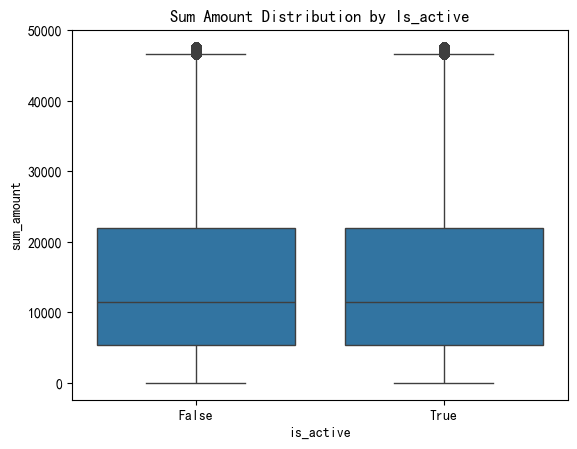

In [16]:
folder_path = 'C:\\Users\\HP\\Downloads\\10G_data_new3'
parquet_files = [f for f in os.listdir(folder_path) if f.endswith('.parquet')]

# 读取dataframe的所有数值变量
data = pd.DataFrame()
for file in parquet_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_parquet(file_path, engine='pyarrow', columns=['is_active', 'sum_amount'])
    data=pd.concat([data, df])

# 分组统计
grouped = data.groupby('is_active')['sum_amount'].describe()
print(grouped)

# 可视化（箱线图或小提琴图）
sns.boxplot(x='is_active', y='sum_amount', data=data)
plt.title('Sum Amount Distribution by Is_active')
plt.show()

## 聚类

In [6]:
from sklearn.cluster import KMeans
import numpy as np
import os
import pyarrow.parquet as pq
import pandas as pd
import time, json
import matplotlib.pyplot as plt
import seaborn as sns
start_time=time.time()

folder_path = 'C:\\Users\\HP\\Downloads\\10G_data_new3'
parquet_files = [f for f in os.listdir(folder_path) if f.endswith('.parquet')]

# 读取dataframe的所有数值变量
data = pd.DataFrame()
for file in parquet_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_parquet(file_path, engine='pyarrow', columns=['age', 'income', 'avg_price', 'sum_amount', 'recency'])
    data=pd.concat([data, df])

data_sum = data['sum_amount'].values.reshape(-1, 1)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(data_sum)
# 获取聚类中心
cluster_centers = kmeans.cluster_centers_

# 输出每个聚类的中心值
print("K=5时，每一类的聚类中心值：")
for i, center in enumerate(cluster_centers, 1):
    print(f"聚类 {i}: {center[0]:.2f}")

print(time.time()-start_time)

K=5时，每一类的聚类中心值：
聚类 1: 17410.51
聚类 2: 38950.32
聚类 3: 3048.42
聚类 4: 27158.94
聚类 5: 9185.76
400.8299160003662


(445769, 6)


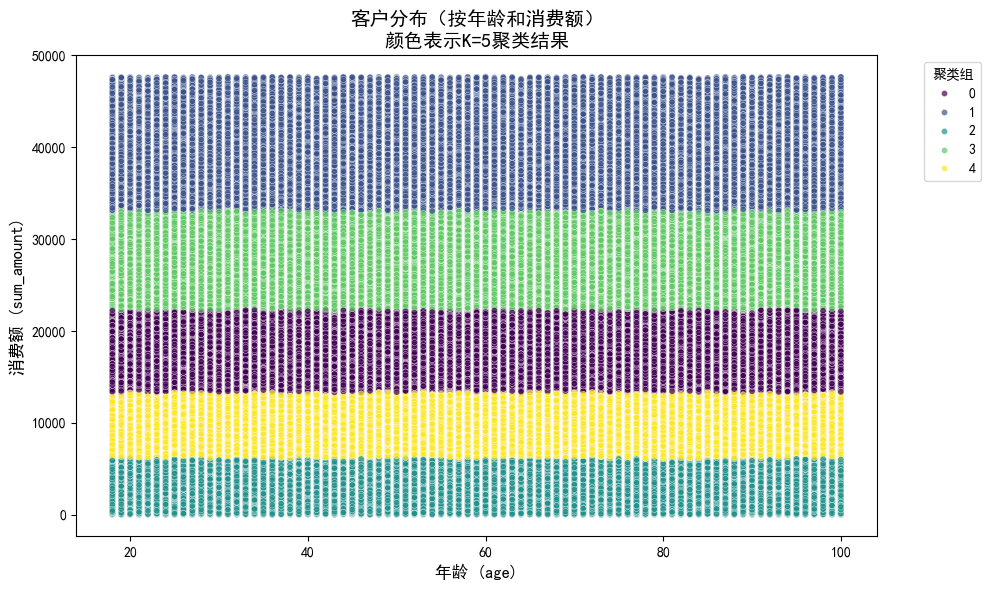

60.29537749290466


In [7]:
start_time=time.time()
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体

data['cluster'] = kmeans.labels_  # 添加聚类标签列
sample_data = data.sample(frac=0.01, random_state=42)
print(sample_data.shape)

# 绘制散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='age',
    y='sum_amount',
    hue='cluster',
    palette='viridis',  # 使用清晰的颜色方案
    data=sample_data,
    s=20,  # 点的大小
    alpha=0.7  # 透明度
)

# 添加标题和标签
plt.title('客户分布（按年龄和消费额）\n颜色表示K=5聚类结果', fontsize=14)
plt.xlabel('年龄 (age)', fontsize=12)
plt.ylabel('消费额 (sum_amount)', fontsize=12)

# 显示图例
plt.legend(title='聚类组', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
print(time.time()-start_time)

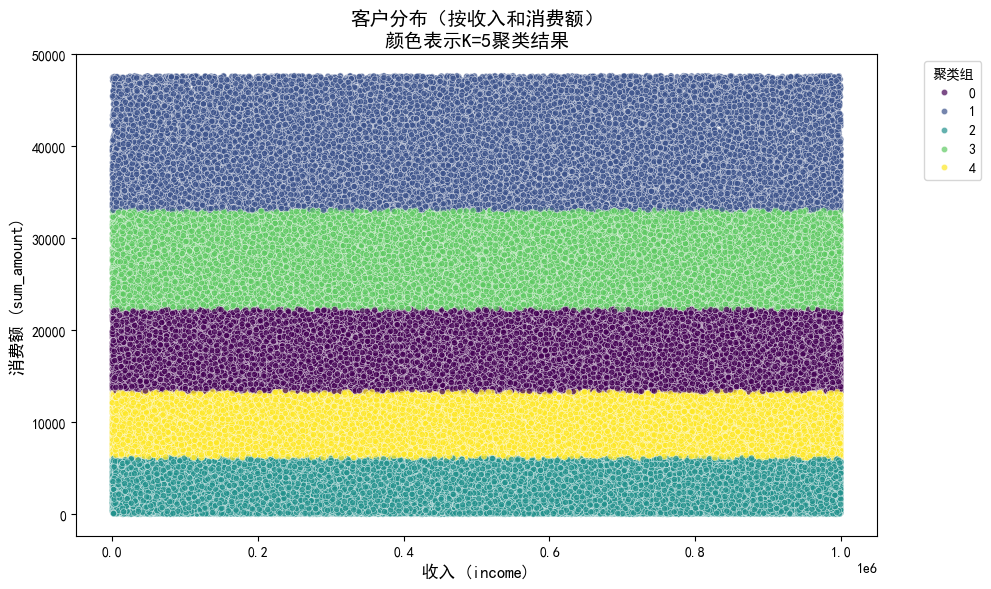

53.794490814208984


In [8]:
start_time=time.time()

# 绘制散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='income',
    y='sum_amount',
    hue='cluster',
    palette='viridis',  # 使用清晰的颜色方案
    data=sample_data,
    s=20,  # 点的大小
    alpha=0.7  # 透明度
)

# 添加标题和标签
plt.title('客户分布（按收入和消费额）\n颜色表示K=5聚类结果', fontsize=14)
plt.xlabel('收入 (income)', fontsize=12)
plt.ylabel('消费额 (sum_amount)', fontsize=12)

# 显示图例
plt.legend(title='聚类组', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
print(time.time()-start_time)

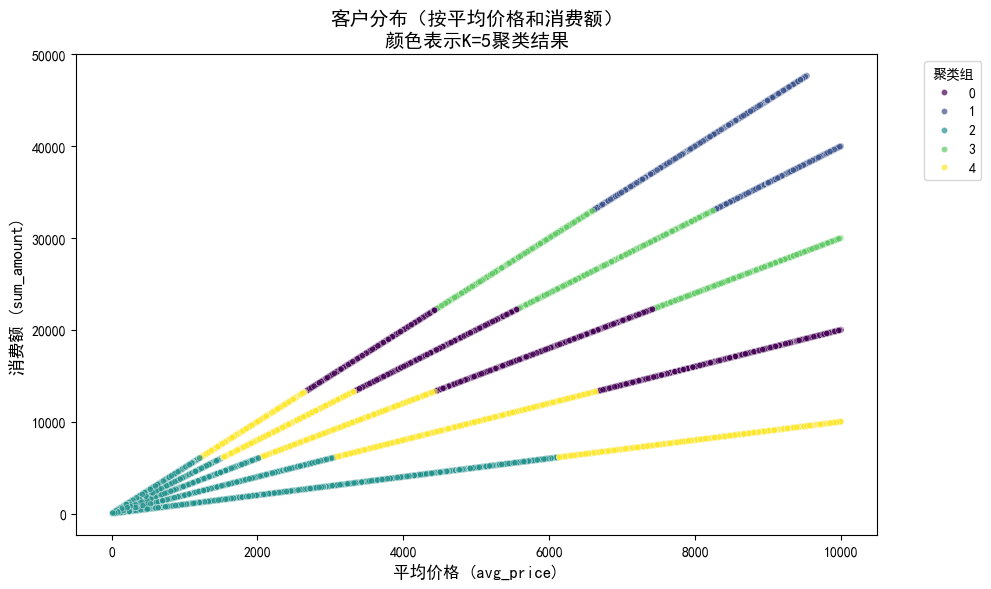

55.669039487838745


In [9]:
start_time=time.time()

# 绘制散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='avg_price',
    y='sum_amount',
    hue='cluster',
    palette='viridis',  # 使用清晰的颜色方案
    data=sample_data,
    s=20,  # 点的大小
    alpha=0.7  # 透明度
)

# 添加标题和标签
plt.title('客户分布（按平均价格和消费额）\n颜色表示K=5聚类结果', fontsize=14)
plt.xlabel('平均价格 (avg_price)', fontsize=12)
plt.ylabel('消费额 (sum_amount)', fontsize=12)

# 显示图例
plt.legend(title='聚类组', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
print(time.time()-start_time)

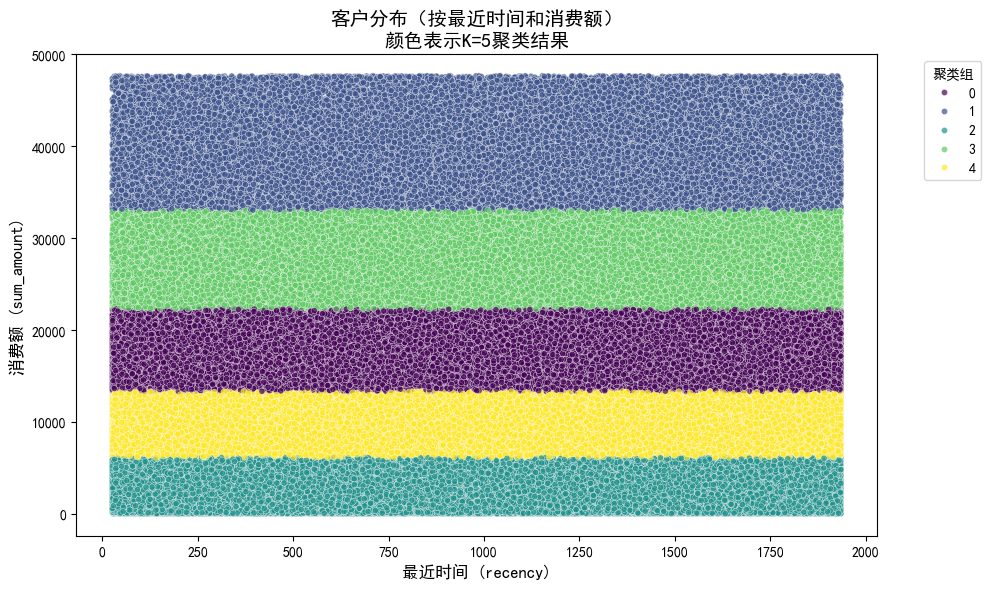

54.146220445632935


In [10]:
start_time=time.time()

# 绘制散点图
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='recency',
    y='sum_amount',
    hue='cluster',
    palette='viridis',  # 使用清晰的颜色方案
    data=sample_data,
    s=20,  # 点的大小
    alpha=0.7  # 透明度
)

# 添加标题和标签
plt.title('客户分布（按最近时间和消费额）\n颜色表示K=5聚类结果', fontsize=14)
plt.xlabel('最近时间 (recency)', fontsize=12)
plt.ylabel('消费额 (sum_amount)', fontsize=12)

# 显示图例
plt.legend(title='聚类组', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
print(time.time()-start_time)